In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
data_2d = pd.read_csv('data_2d.csv')
mnist_data = pd.read_csv('mnist.csv')

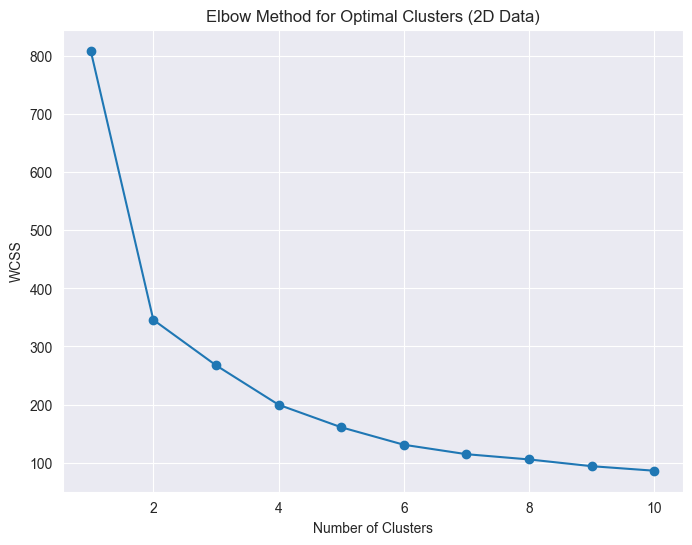

[809.2157980450891,
 345.7643186217374,
 267.54273598321157,
 199.57132906670574,
 160.79863090065996,
 130.68834355403146,
 114.43207689817254,
 105.39540860269446,
 93.77223756455749,
 85.97369572936509]

In [49]:

# Видаляємо перший стовпець, оскільки він не містить інформативних даних
data_2d_cleaned = data_2d.drop(columns=[data_2d.columns[0]])

# Функція для обчислення суми квадратичних відхилень (WCSS) для різної кількості кластерів
def calculate_wcss(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Обчислюємо WCSS для діапазону від 1 до 10 кластерів
wcss_2d = calculate_wcss(data_2d_cleaned, max_clusters=10)

# Візуалізація ліктевого методу
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_2d, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters (2D Data)')
plt.grid(True)
plt.show()

# Повертаємо обчислені WCSS для подальшого аналізу
wcss_2d

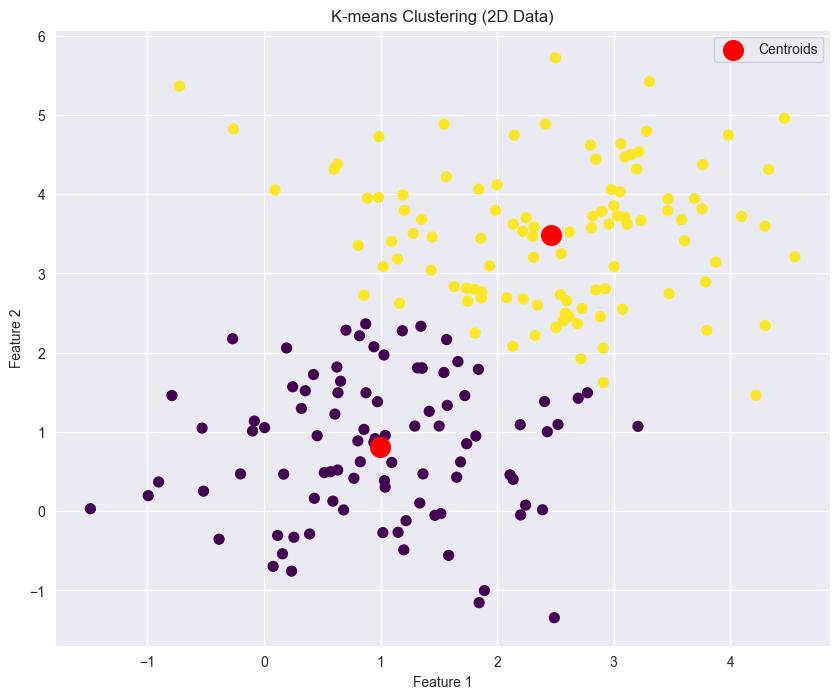

In [50]:
optimal_clusters_2d = 2
kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, random_state=42)
clusters_2d = kmeans_2d.fit_predict(data_2d_cleaned)

# Візуалізація кластерів
plt.figure(figsize=(10, 8))
plt.scatter(data_2d_cleaned.iloc[:, 0], data_2d_cleaned.iloc[:, 1], c=clusters_2d, cmap='viridis', s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering (2D Data)')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
mnist_features = mnist_data.drop(columns=[mnist_data.columns[0]])

In [52]:
mnist_sample = mnist_features.head(100)

In [53]:
wcss_mnist = calculate_wcss(mnist_sample, max_clusters=10)

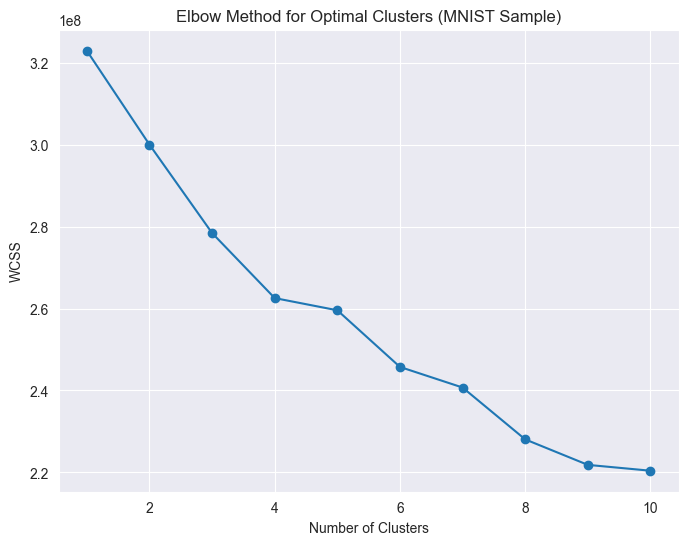

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_mnist, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters (MNIST Sample)')
plt.grid(True)
plt.show()

In [55]:
optimal_clusters_mnist = 3

In [56]:
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, random_state=42)
clusters_mnist = kmeans_mnist.fit_predict(mnist_sample)

In [57]:
pca = PCA(n_components=2)
mnist_sample_pca = pca.fit_transform(mnist_sample)

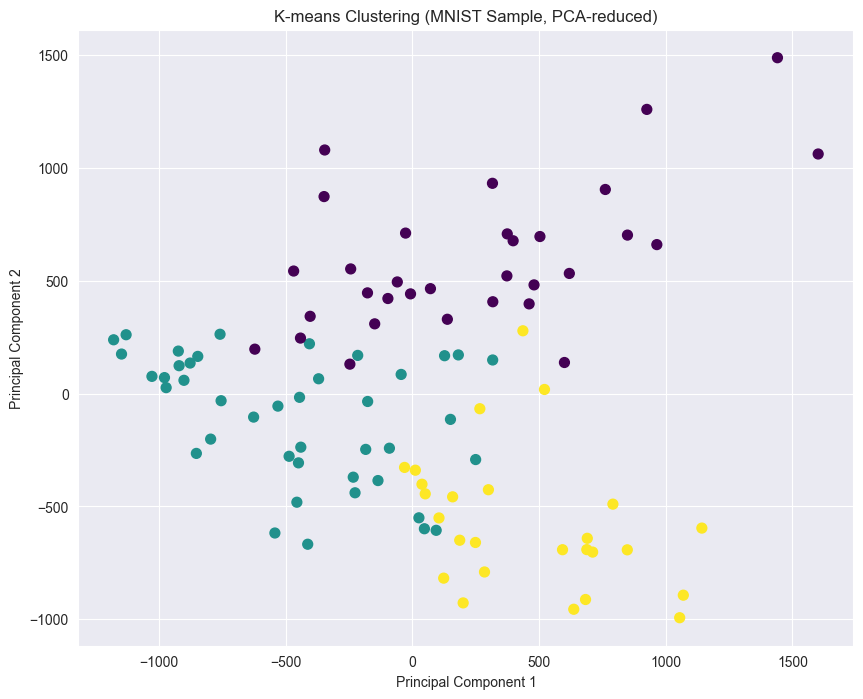

In [58]:
plt.figure(figsize=(10, 8))
plt.scatter(mnist_sample_pca[:, 0], mnist_sample_pca[:, 1], c=clusters_mnist, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (MNIST Sample, PCA-reduced)')
plt.grid(True)
plt.show()

In [59]:
print("Кластерні мітки для mnist.csv:", clusters_mnist)

Кластерні мітки для mnist.csv: [0 1 0 2 1 2 1 2 1 0 0 2 0 1 0 2 2 0 2 1 0 2 1 2 0 2 2 0 1 0 1 0 0 1 0 2 1
 0 1 1 1 2 1 1 0 1 1 2 2 0 0 1 0 2 0 2 1 2 1 2 1 1 1 1 1 1 2 0 0 2 0 0 1 1
 1 0 1 1 1 2 0 0 2 1 2 1 0 0 1 0 1 1 0 1 2 1 1 0 2 1]
